### 多分类问题中的混淆矩阵

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1e6)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9381084840055632

In [6]:
y_predict = log_reg.predict(X_test)

In [7]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict, average="micro")

0.9381084840055632

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[148,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 122,   2,   1,   0,   0,   1,   4,   1,  12],
       [  0,   1, 134,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   2, 139,   0,   4,   0,   1,   2,   1],
       [  1,   3,   0,   0, 141,   0,   1,   3,   0,   1],
       [  1,   4,   1,   0,   0, 144,   1,   0,   0,   1],
       [  1,   2,   0,   0,   0,   1, 132,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135,   0,   1],
       [  0,   8,   3,   2,   4,   4,   0,   1, 116,   2],
       [  0,   0,   0,   7,   0,   1,   0,   1,   0, 138]], dtype=int64)

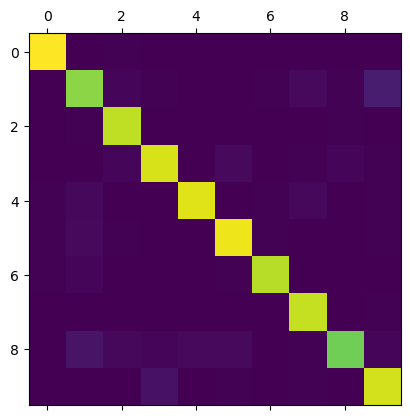

In [9]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm)
plt.show()

## 误差矩阵

In [10]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
#col_sums = np.sum(cfm, axis=0)
np.fill_diagonal(err_matrix, 0)
err_matrix

array([[0.        , 0.        , 0.00735294, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01470588, 0.00671141, 0.        ,
        0.        , 0.00735294, 0.02941176, 0.00714286, 0.08163265],
       [0.        , 0.00699301, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.01470588, 0.        , 0.        ,
        0.02631579, 0.        , 0.00735294, 0.01428571, 0.00680272],
       [0.00671141, 0.02097902, 0.        , 0.        , 0.        ,
        0.        , 0.00735294, 0.02205882, 0.        , 0.00680272],
       [0.00671141, 0.02797203, 0.00735294, 0.        , 0.        ,
        0.        , 0.00735294, 0.        , 0.        , 0.00680272],
       [0.00671141, 0.01398601, 0.        , 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

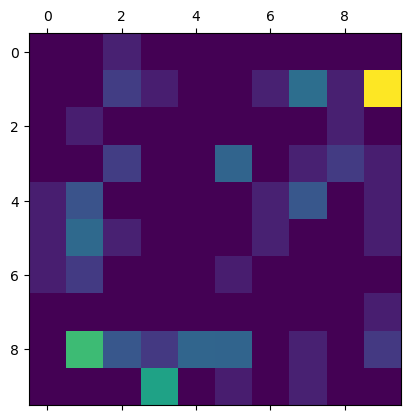

In [11]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(err_matrix)
plt.show()